<a href="https://colab.research.google.com/github/Mikaykay/DS-Unit-2-Linear-Models/blob/master/DS29_GP_Unit2_Sprint1_Module1_Nivi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Unit 2 Sprint 1 Module 1

# I. Wrangle Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

## Write a function!

In [ ]:
DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data'

def wrangle(filepath):
  df = pd.read_csv(filepath,
                   na_values=[0.0],
                   parse_dates=['SALE_DATE'])


  # Low cardinality
  df.drop(columns=['NEIGHBORHOOD','BUILDING_CLASS_CATEGORY'],inplace=True)

  #Dropping due to high cardinality
  df.drop(columns=['ADDRESS','APARTMENT_NUMBER'],inplace=True)

  return df

df = wrangle(DATA_PATH + '/condos/tribeca.csv')

In [ ]:
df.head()

,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,SALE_DATE
0,10013.0,1840.0,1909.0,2800000,2019-01-03
1,10004.0,1759.0,NaN,2650000,2019-01-07
2,10004.0,1190.0,2005.0,1005000,2019-01-09
3,NaN,1088.0,2006.0,1678000,2019-01-10
4,10280.0,873.0,NaN,1380000,2019-01-11


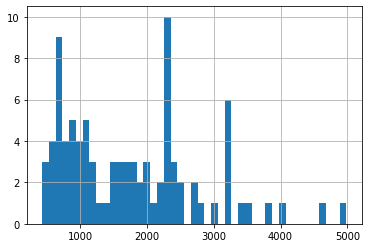

In [ ]:
df['GROSS_SQUARE_FEET'].hist(bins=45)

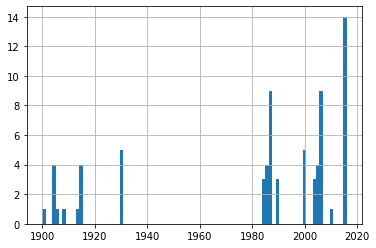

In [ ]:
df['YEAR_BUILT'].hist(bins=90)


# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [ ]:
# Use a double square brackets to create a 2D matrix and a single square bracket when you need a vector.
X = df[['GROSS_SQUARE_FEET']]
#target vector
y = df['SALE_PRICE']


In [ ]:
X.shape

(90, 2)

In [ ]:
y.shape

(90,)

# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [ ]:
y.describe()

count    9.000000e+01
mean     3.928736e+06
std      3.621996e+06
min      4.247700e+05
25%      1.156552e+06
50%      2.750000e+06
75%      5.087500e+06
max      1.500000e+07
Name: SALE_PRICE, dtype: float64

In [ ]:
y.mean()

3928736.3666666667

In [ ]:
y_baseline = [y.mean()]*len(y)

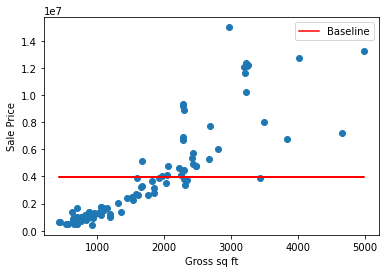

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_baseline,label='Baseline',color='red')
plt.xlabel('Gross sq ft')
plt.ylabel('Sale Price')
plt.legend()

# IV. Build Model

In [ ]:
#Step1: Import library to use our machine learning algorithm
from sklearn.linear_model import LinearRegression

#Step2: "Instantiate" your model and set parameters.
model_lr = LinearRegression()

#Step3: Fit your model for the given data (Training)
model_lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#dir(model_lr)

In [ ]:
model_slope = model_lr.coef_[0]
print(model_slope)

3076.4476554190023


In [ ]:
model_intercept = model_lr.intercept_
print(model_intercept)

-1505364.0408585514


# V. Check Metrics



![MAE](https://www.statisticshowto.com/wp-content/uploads/2016/10/MAE.png)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("BASELINE MAE:", mean_absolute_error(y,y_baseline))

BASELINE MAE: 2783380.1977777784


In [ ]:
y_pred_lr = model_lr.predict(X)

In [ ]:
y_pred_lr[:20]

array([ 4155299.64511241,  3906107.38502347,  2155608.66909006,
        1841811.00823732,  1180374.76232224,  5505860.16584135,
         632767.07965766,  2952408.61184358,  5505860.16584135,
        8422332.54317857,  5413566.73617879, 12840111.37636026,
       13833803.96906059,  5988862.44774214,  4401415.45754593,
        -176338.65371754,  4841347.47227085,  8363880.03772561,
        1164992.52404514,  5505860.16584135])

In [ ]:
from sklearn.metrics import mean_absolute_error
print("BASELINE MAE:", mean_absolute_error(y,y_pred_lr))

BASELINE MAE: 1176817.9930150746


### Check the baseline metric

# VI. Communicate Results

Plot model

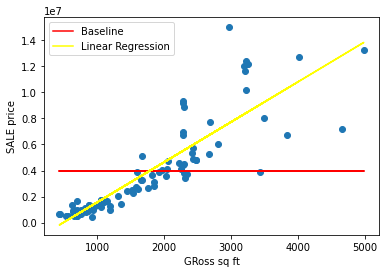

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_baseline,label='Baseline',color='red')
plt.plot(X,y_pred_lr,label='Linear Regression',color='yellow')
plt.xlabel('GRoss sq ft')
plt.ylabel('SALE price')
plt.legend()

So what is our equation?
$$\hat{y}=-1505364+3076*SQFT$$